In [73]:
#This file is the successor to ML1. Functions are a bit more modular
#draws functions from jurrefuncs.py
#will use this file to study the correlations of the multi cluster data when it becomes available
from jurrefuncs import *
import numpy as np


In [74]:
#retrieve the data from several files and put it in datamatrix
from numpy import genfromtxt
dataFile = []
rangenr = 10
for i in range(1, rangenr):
    dataFile.append(genfromtxt("feature extraction\dataset\clustering\sum up of the feature\sumupCluster_"+ str(i) +"_train_org.csv", delimiter=','))
#dataMatrix = genfromtxt("feature extraction\dataset\clustering\sum up of the feature\sumupCluster_4_train_org.csv", delimiter=',')
featurelength = len(dataFile[0]) -1

tempMatrix = np.array([dataFile[i][0:-1] for i in range(0, rangenr-1) ])
features = tempMatrix.reshape(-1, tempMatrix.shape[-1])
labels = dataFile[0][6]

#Also import the testdata

testdataFile = []
for i in range(1, rangenr):
    testdataFile.append(genfromtxt("feature extraction\dataset\clustering\sum up of the feature\sumupCluster_"+ str(i) +"_test_org.csv", delimiter=','))



testtempMatrix = np.array([testdataFile[i] for i in range(0, rangenr-1) ]) #does nothing
testfeatures = testtempMatrix.reshape(-1, testtempMatrix.shape[-1])



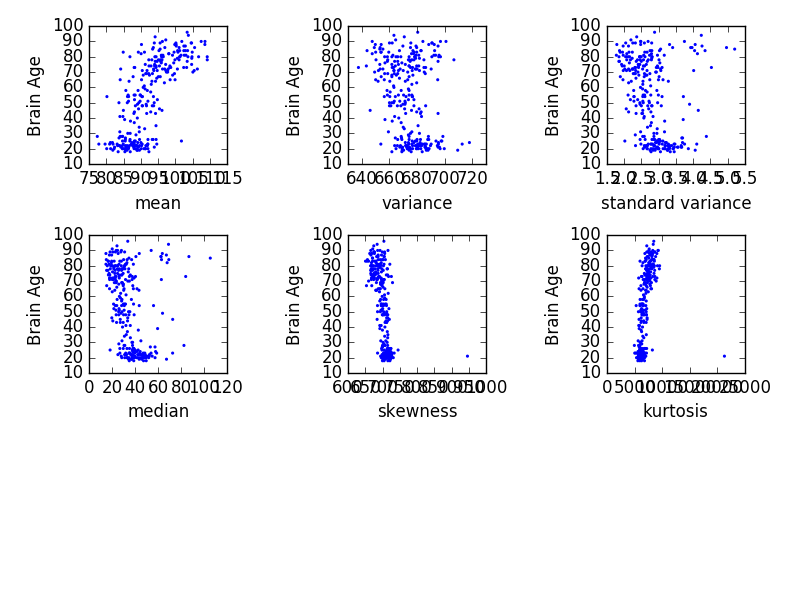

In [103]:
x_names = ['mean', 'variance' , 'standard variance', 'median', 'skewness', 'kurtosis']
y_name = 'Brain age'
scatterPlotGrid(features[20:26], labels, 3, 3, x_names, y_name) 

In [86]:
#Recursive feature selection with cross validation, seems to take a while sadly
#This is the one we are going to use in ML3
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
#X = [[dataMatrix[i][j] for i in range(0, 6)] for j in range(0, len(dataMatrix[1]))   ]
#y = dataMatrix[6]

X = [[features[i][j] for i in range(0, len(features))] for j in range(0, len(features[0]))   ] 
#X = [[features[i][j] for i in range(0, len(features) )] for j in range(0, len(features[0]))   ] 
y = labels
estimator = SVR(kernel="linear")
selector = RFECV(estimator, step=1, cv=3)
selector = selector.fit(X, y)
selectedBool = selector.support_ 
selectedBool


array([ True, False, False, False, False, False, False, False,  True,
        True,  True,  True, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False,  True, False, False,  True, False, False], dtype=bool)

In [17]:
selectedFeatures = []
for i in range(0, len(selectedBool) ):
    if selectedBool[i] == True:
        selectedFeatures.append(features[i])
    

In [88]:
testData = [[testfeatures[i][j] for i in range(0, len(features))] for j in range(0, len(testfeatures[0]))   ]
ans = selector.predict(testData)

import csv
c = csv.writer(open("submissionjurre3.csv", "wb"))
c.writerow(['ID' , 'Prediction'])
for i in range(0, len(ans)):
    c.writerow([i+1 , ans[i]])

In [89]:
print(y[3])
print(selector.predict(testData[1]))



84.0
[ 78.40918525]


C:\Users\jurre\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [71]:
print(X[1][6:10])
print(testData[1][6:10])

[485.33999999999997, 42408.0, 173.78999999999999, 449.0]
[536.52999999999997, 43949.0, 187.19999999999999, 516.0]


In [ ]:
#from sklearn.linear_modelinear import lasso

from sklearn import datasets, linear_model

features = [[dataMatrix[i][j] for i in range(0, 6)] for j in range(0, len(dataMatrix[1]))   ]
label = dataMatrix[6]
regr = linear_model.LinearRegression()
regr.fit(features , labels)


In [ ]:
testdataMatrix = genfromtxt("feature extraction\dataset\clustering\sum up of the feature\sumupCluster_4_test_org.csv", delimiter=',')
testData = [[testdataMatrix[i][j] for i in range(0, 6)] for j in range(0, len(testdataMatrix[1]))   ]
ans = regr.predict(testData)

import csv
c = csv.writer(open("submissionjurre3.csv", "wb"))
c.writerow(['ID' , 'Prediction'])
for i in range(0, len(ans)):
    c.writerow([i+1 , ans[i]])

In [ ]:
#Recursive feature selection with cross validation, seems to take a while sadly
#This is the one we are going to use in ML3
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
X = [[dataMatrix[i][j] for i in range(0, 6)] for j in range(0, len(dataMatrix[1]))   ]
y = dataMatrix[6]
estimator = SVR(kernel="gaussian")
selector = RFECV(estimator, step=2, cv=5)
selector = selector.fit(X, y)
selector.support_ 


In [4]:
import ML3

ML3

<module 'ML3' from 'ML3.py'>

AttributeError: 'module' object has no attribute 'run'